# <span style="color:red">Solution</span> - Open Midterm 1

## FINM 36700 - 2025

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

***

## Data

**All data files are found in at the course web-book.**

https://markhendricks.github.io/finm-portfolio/.

## Scoring

| Problem | Points |
|---------|--------|
| 1       | 70     |
| 2       | 30     |

**Numbered problems are worth 5pts unless specified otherwise.**

***

# 1. Portfolio Analysis

### Data

Use the data in `data/midterm_1_stock_returns.xlsx`.

The returns are...
* excess returns
* weekly
* through `May 2025`

It has returns for
* `25` single-name equities
* `SPY`

In [ ]:
# Load packages, helper functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import helper_functions as pmh
import warnings
warnings.filterwarnings("ignore")

# Load data
DATAFILE_STOCKS = 'data/midterm_1_stock_returns.xlsx'
rets = pd.read_excel(DATAFILE_STOCKS, sheet_name='stock rets', index_col='date', parse_dates=['date'])
spy = pd.read_excel(DATAFILE_STOCKS, sheet_name='benchmark rets', index_col='date', parse_dates=['date'])

# Preview data
display(rets.head())
display(spy.tail())

,ADSK,AOS,BKNG,CBRE,CCI,CF,CHRW,DE,DGX,DTE,...,MRK,MTD,PG,PNR,SBAC,STE,TTWO,VTRS,WM,WMT
date,,,,,,,,,,,,,,,,,,,,,
2015-01-09,-0.021166,-0.008927,-0.078893,-0.000577,0.026536,0.069378,-0.024107,-0.030450,-0.003635,-0.002414,...,0.093897,-0.008843,-0.002101,-0.023393,-0.001091,0.013659,-0.008009,-0.009050,-0.004251,0.040160
2015-01-16,-0.024369,-0.015313,-0.041579,-0.045022,0.012374,0.001515,0.019290,0.019265,0.019738,0.036405,...,0.007512,-0.024325,0.011081,-0.009830,-0.012042,-0.020590,0.048080,0.002865,0.013778,-0.028873
2015-01-23,0.023571,0.016282,0.029527,-0.004231,0.050829,0.013841,0.009121,0.012027,0.016490,0.014229,...,-0.008567,0.037842,-0.005804,-0.003565,0.080951,0.023033,0.022253,-0.031965,0.014548,0.020053
2015-01-30,-0.071920,0.069487,-0.027466,-0.018513,-0.003684,0.012031,-0.039124,-0.035766,0.002540,-0.017317,...,-0.035366,0.002970,-0.064277,-0.033041,-0.014190,-0.014506,-0.004689,-0.019552,-0.029622,-0.039883
2015-02-06,0.056754,0.037577,0.012818,0.048856,0.001733,-0.028619,-0.009970,0.044489,-0.020120,-0.049186,...,-0.024717,0.016318,0.015660,0.040609,0.010108,0.026985,-0.031460,0.013922,0.019639,0.027653


,SPY
date,
2025-04-25,0.046029
2025-05-02,0.029275
2025-05-09,-0.004270
2025-05-16,0.052911
2025-05-23,-0.025395


## 1 Performance Stats

#### 1.1. Calculate the Sharpe ratio for each stock during the sample period
* Recall: the sample period ranges from **January 2015 to December 2024 (inclusive)**.
* Report the top 5 stocks with the highest Sharpe ratios.

In [ ]:
# Define sample period
start_date, end_date = '2015-01-01', '2024-12-31'
sample_rets = rets[start_date:end_date]

# Calculate Sharpe ratios (annualized)
ANNUAL_FACTOR = 52
mean_ret, std_ret = sample_rets.mean() * ANNUAL_FACTOR, sample_rets.std() * (ANNUAL_FACTOR ** 0.5)  # annualized
sharpe_ratios = pd.Series(mean_ret / std_ret, name = 'Sharpe Ratio')
sharpe_ranked = sharpe_ratios.sort_values(ascending=False)

# Display top 5 stocks
print("Top 5 Stocks by Sharpe Ratio:")
print(sharpe_ranked.head(5))

Top 5 Stocks by Sharpe Ratio:
WM       0.929781
GOOGL    0.854801
INTU     0.843681
TTWO     0.785463
WMT      0.773420
Name: Sharpe Ratio, dtype: float64


#### 1.2. Display the correlation matrix for the first ten stocks (columns) over the sample period.
* On average, are these stocks highly correlated? Explain.
* Which of these stocks offer the best diversification benefits?

<span style="color:red">There are multiple ways to determine which stocks offer the best diversification benefits. I consider the average pairwise correlations and find that CHRW, CF have substantially lower correlations than the other equities.</span>

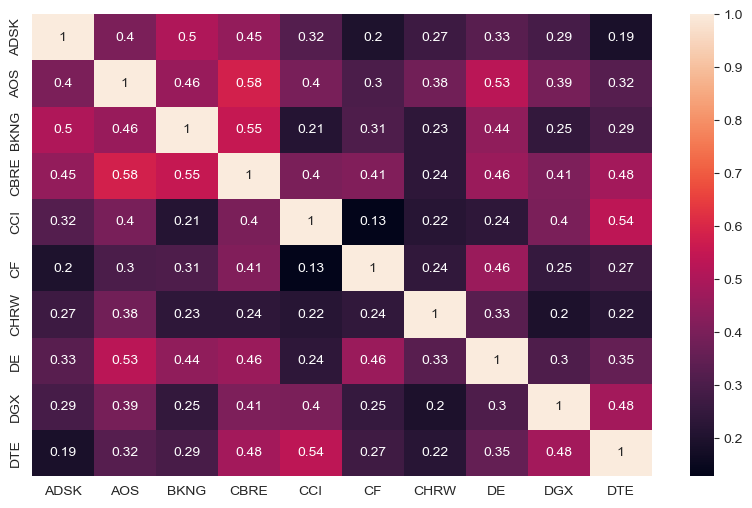

Average Pairwise Correlations:
CHRW    0.231889
CF      0.257515
CCI     0.284330
ADSK    0.294487
DGX     0.296499
DTE     0.314566
BKNG    0.324785
DE      0.344244
AOS     0.375968
CBRE    0.397587
dtype: float64


In [ ]:
# Display correlation matrix
returns = sample_rets.iloc[:, :10].copy()
correlation_matrix = returns.corr()
fig, ax = plt.subplots(figsize=(10,6))
heatmap = sns.heatmap(
    correlation_matrix,
    xticklabels=correlation_matrix.columns,
    yticklabels=correlation_matrix.columns,
    annot=True,
)
heatmap; plt.show()

# Calculate average pairwise correlations for each stock
# Subtract the contribution of the diagonal = 1/10 in the average
corr_avg = correlation_matrix.mean() - (1 / len(correlation_matrix))
print("Average Pairwise Correlations:")
print(corr_avg.sort_values(ascending=True))

## 2. In-Sample Tangency (excess returns)

#### Note
Consider `in-sample` to be all the data through the end of `2024`.

#### 2.1. Construct the tangency portfolio

Using just the in-sample data (through `2024`), calculate the tangency portfolio weights, assuming we have excess returns (existence of a risk-free rate.)
   * Display the ten largest portfolio weights.
   * Plot the Sharpe ratios against the portfolio weights.

Top 10 Tangency Portfolio Weights:
DTE      0.452431
WM       0.364931
GOOGL    0.205688
TTWO     0.198862
DE       0.191454
WMT      0.185139
MRK      0.168538
CBRE     0.167008
PG       0.087959
INTU     0.084542
Name: Tangency Weights, dtype: float64


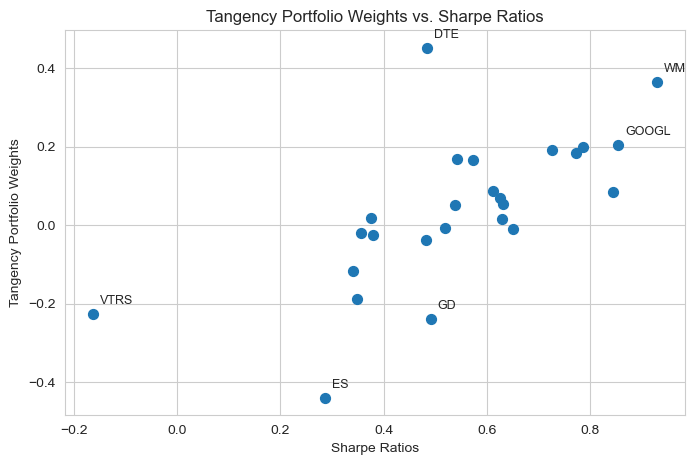

In [ ]:
# Construct the tangency portfolio
tangency_wts = pmh.calc_tangency_weights(returns = sample_rets,
                          return_port_ret= False,
                          annual_factor = 52, # weekly data
                          name = 'Tangency',
                          expected_returns = None,
                          expected_returns_already_annualized = False)

# Display the ten largest weights
top_10_weights = tangency_wts['Tangency Weights'].sort_values(ascending=False).head(10)
print("Top 10 Tangency Portfolio Weights:")
print(top_10_weights)

# Plot Sharpe ratios vs. portfolio weights
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(sharpe_ratios, tangency_wts['Tangency Weights'], s=50)
ax.set_xlabel('Sharpe Ratios'); ax.set_ylabel('Tangency Portfolio Weights')
ax.set_title('Tangency Portfolio Weights vs. Sharpe Ratios')
ax.grid(True)

# label firms with large (absolute) weights >= 0.2 or <= -0.2
for name, wt in tangency_wts['Tangency Weights'].items():
    if (wt >= 0.2) or (wt <= -0.2):
        sr = sharpe_ratios.loc[name]
        ax.annotate(
            name, xy=(sr, wt),  xytext=(5, 5), textcoords='offset points',
            fontsize=9, ha='left', va='bottom')
plt.show()

#### 2.2.

Compare the relationship between tangency portfolio weights and individual sharpe ratios.

<span style="color:red">Mean variance optimization allocates higher (absolute) weight to assets with: (1) higher expected return, (2) lower volatility, and (3) lower covariances with other assets. Given that (1) and (2) directly determine the Sharpe ratio, there exists a positive relationship between the portfolio weights and Sharpe ratios.</span>

In [ ]:
# Regress weights on Sharpe ratios (empirical evidence of relationship)
X = sm.add_constant(sharpe_ratios)
y = tangency_wts['Tangency Weights']
model = sm.OLS(y, X).fit()
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Tangency Weights   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     18.09
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           0.000300
Time:                        20:38:50   Log-Likelihood:                 13.499
No. Observations:                  25   AIC:                            -23.00
Df Residuals:                      23   BIC:                            -20.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2631      0.077     -3.412      0.002      -0.423      -0.104
Sharpe Ratio     0.5563      0.131      4.253      0.000       0.286       0.827
==============================================================================
Omnibus:                        8.267   Durbin-Watson:                   2.222
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                9.576
Skew:                           0.528   Prob(JB):                      0.00833
Kurtosis:                       5.842   Cond. No.                         5.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 2.3. Performance of the Tangency

Continue with the in-sample tangency portfolio constructed above, and analyze how it performs in-sample (through `2024`.)

   Report the (annualized)
   * mean
   * volatility
   * Sharpe ratio
   * skewness (not annualized)
   
   Plot the cumulative return of the tangency portfolio over the sample period.

,Tangency
Mean,0.2993
Volatility,0.1811
Sharpe Ratio,1.6533
Skewness,-0.0830
Excess Kurtosis,-1.6122
Historical VaR 0.05,-0.0328
Historical CVaR 0.05,-0.0490


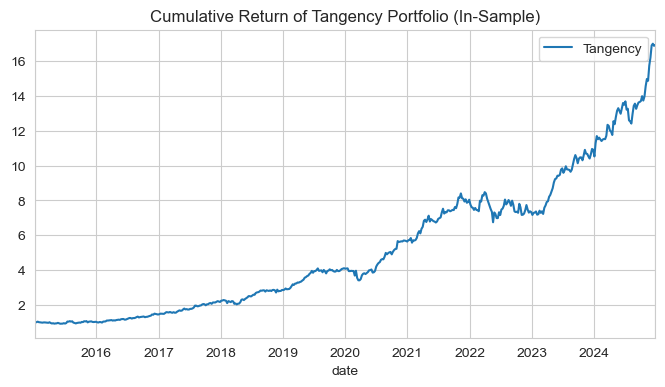

In [ ]:
# Calculate expected return of tangency portfolio in-sample
portfolio_ret = pd.DataFrame(tangency_wts['Tangency Weights'] @ rets.T) # compute for all returns
portfolio_ret.columns = ['Tangency']

# Tangency portfolio statistics
tangency_stats = pd.DataFrame()
stat_names = ['Mean', 'Volatility', 'Sharpe Ratio', 'Skewness', 'Excess Kurtosis', 'Historical VaR 0.05', 'Historical CVaR 0.05']
tangency_stats['Tangency'] = pmh.stats(portfolio_ret[start_date:end_date], tail_risk_stats = True, annualization = 52)[stat_names].T
display(tangency_stats)

# plot cumulative return of tangency portfolio in-sample
cum_ret_in_sample = (portfolio_ret[start_date:end_date] + 1).cumprod()
cum_ret_in_sample.plot(figsize=(8,4), title='Cumulative Return of Tangency Portfolio (In-Sample)'); plt.show()

## 3. Hedging the Tangency Portfolio

Continue with the in-sample (through 2024) tangency returns calculated in the previous problem.

#### 3.1.

Compute portfolio returns and regress on `SPY` to get $\hat{\beta}$. 

Include an intercept in the regression.

Report $\hat{\beta}$.

In [ ]:
# Regress tangency portfolio returns on SPY to get beta
spy_in_sample = spy[start_date:end_date]['SPY']
X = sm.add_constant(spy_in_sample)
y = portfolio_ret[start_date:end_date]['Tangency']
model = sm.OLS(y, X).fit()
beta_hat = model.params['SPY']
print(f"Estimated Beta: {beta_hat:.4f}")

Estimated Beta: 0.6048


#### 3.2.

Calculate the returns to the hedged position.

   Report the (annualized)
   * mean
   * volatility
   * Sharpe ratio
   * skewness (not annualized)

<span style="color:red">Using the hedge ratio from the previous question $\hat{\beta}$, hedged returns equal the tangency portfolio returns less the product of the hedge ratio and SPY returns.</span>

In [ ]:
# calculate hedged returns (tangency return
portfolio_ret['Hedged Tangency'] = portfolio_ret['Tangency'] - beta_hat * spy_in_sample

# Performance statistics
tangency_stats['Hedged Tangency'] = pmh.stats(portfolio_ret[['Hedged Tangency']].loc[start_date:end_date], tail_risk_stats = True, annualization = 52)[stat_names].T
display(tangency_stats)

,Tangency,Hedged Tangency
Mean,0.2993,0.2160
Volatility,0.1811,0.1499
Sharpe Ratio,1.6533,1.4404
Skewness,-0.0830,0.1697
Excess Kurtosis,-1.6122,-1.9925
Historical VaR 0.05,-0.0328,-0.0265
Historical CVaR 0.05,-0.0490,-0.0393


## 4. Out-of-Sample

#### 4.1. Tangency Portfolio Performance: Out-of-Sample (OOS)

Use the weights of the tangency portfolio calculated above.

Compute the out-of-sample returns (`2025`), and just for this OOS portion, report the (annualized)
* mean
* volatility
* Sharpe ratio
* skewness (not annualized)

#### 4.2. Cumulative performance

* Include the OOS performance in the cumulative return plot (in addition to the in-sample performance).

Show the plot.

,Tangency,Hedged Tangency,Tangency OOS
Mean,0.2993,0.2160,0.4346
Volatility,0.1811,0.1499,0.2169
Sharpe Ratio,1.6533,1.4404,2.0034
Skewness,-0.0830,0.1697,-0.2853
Excess Kurtosis,-1.6122,-1.9925,-2.9617
Historical VaR 0.05,-0.0328,-0.0265,-0.0391
Historical CVaR 0.05,-0.0490,-0.0393,-0.0482


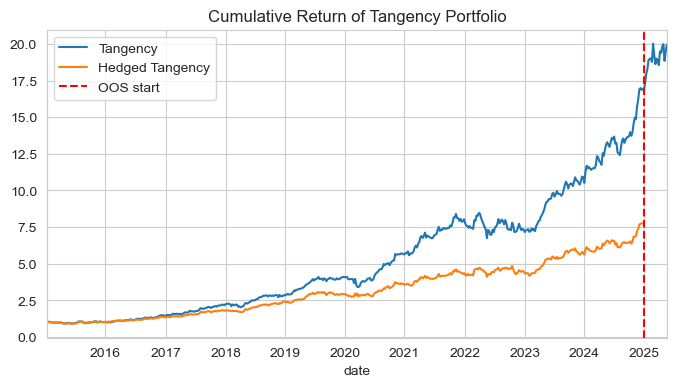

In [ ]:
# Calculate out-of-sample tangency portfolio returns
tangency_stats['Tangency OOS'] = pmh.stats(portfolio_ret[['Tangency']].loc[end_date:], tail_risk_stats = True, annualization = 52)[stat_names].T
display(tangency_stats)

# Cumulative performance plot including OOS
# add
cum_ret = (portfolio_ret + 1).cumprod()
ax = cum_ret.plot(figsize=(8,4), title='Cumulative Return of Tangency Portfolio')
ax.axvline(pd.to_datetime('2025-01-01'), color='red', linestyle='--', linewidth=1.5, label='OOS start')
ax.legend(); plt.show()

## 5. Optimizing Hedged Returns

#### 5.1. Construct Market-Hedged Returns

Active managers might optimize their portfolios using market-hedged returns to focus on alpha generation (maximize portion of returns orthogonal to the market). Market-hedged returns are the residuals from regressing each stock’s excess return on the market’s excess return (e.g., `SPY`), effectively removing market beta to isolate stock-specific (idiosyncratic) performance.

* Regress each stock's excess return on the SPY index (quoted in excess return) over the sample period. 
* Include an intercept.
* Report your betas.

In [ ]:
# RUN REGRESSIONS WITH FULL SAMPLE TO GIVE STUDENTS PARTIAL CREDIT IF NEEDED
# Regress each stock's excess return on SPY excess return (& constant) to get market-hedged returns
alphas, betas = pd.Series(index = rets.columns, name = 'Alpha'),pd.Series(index = rets.columns, name = 'Beta')
market_hedged_returns = pd.DataFrame(index=rets.index)
for stock in rets.columns:
    tmp_regress = sm.OLS(rets[stock], sm.add_constant(spy)).fit()
    alphas[stock] = tmp_regress.params[0]
    betas[stock] = tmp_regress.params[1]
    market_hedged_returns[stock] = tmp_regress.resid

# Display first 5 betas and alphas
print("Partial Credit: First 5 Betas and Alphas:")
display(pd.DataFrame([betas, alphas]).T.head(5))

# Regress each stock's excess return on SPY excess return (& constant) to get market-hedged returns
alphas, betas = pd.Series(index = sample_rets.columns, name = 'Alpha'),pd.Series(index = sample_rets.columns, name = 'Beta')
market_hedged_returns = pd.DataFrame(index=sample_rets.index)
for stock in sample_rets.columns:
    tmp_regress = sm.OLS(sample_rets[stock], sm.add_constant(spy_in_sample)).fit()
    alphas[stock] = tmp_regress.params[0]
    betas[stock] = tmp_regress.params[1]
    market_hedged_returns[stock] = tmp_regress.resid

# Display first 5 betas and alphas
print("Full Credit: First 5 Betas and Alphas:")
display(pd.DataFrame([betas, alphas]).T.head(5))

Partial Credit: First 5 Betas and Alphas:


,Beta,Alpha
ADSK,1.311552,0.000821
AOS,1.026381,0.000049
BKNG,1.254642,0.000682
CBRE,1.302287,0.000014
CCI,0.676221,0.000094


Full Credit: First 5 Betas and Alphas:


,Beta,Alpha
ADSK,1.346120,0.000717
AOS,1.050560,-0.000041
BKNG,1.270031,0.000489
CBRE,1.325140,0.000017
CCI,0.737463,-0.000341


#### 5.2. The residuals

Save the residuals from each regression as the market-hedged returns. 

Report the `.tail()` (last 5 observations) of the residual dataframe.

In [ ]:
# Market hedged returns as regression residuals
display(market_hedged_returns.tail(5))

,ADSK,AOS,BKNG,CBRE,CCI,CF,CHRW,DE,DGX,DTE,...,MRK,MTD,PG,PNR,SBAC,STE,TTWO,VTRS,WM,WMT
date,,,,,,,,,,,,,,,,,,,,,
2024-11-29,-0.108049,0.001919,-0.010707,0.017987,-0.000695,-0.013378,-0.026047,0.028463,-0.015035,0.001000,...,0.018365,0.013934,0.009785,0.004557,0.015754,0.010505,-0.009923,-0.028645,0.007773,0.015156
2024-12-06,0.041694,-0.034368,0.009021,-0.026658,-0.047508,-0.022482,-0.000899,-0.058154,-0.039673,-0.039778,...,0.009273,-0.004627,-0.035752,-0.018765,-0.032963,-0.023136,-0.001839,-0.032969,-0.030388,0.028523
2024-12-13,-0.005549,0.004611,-0.006689,0.003625,-0.026479,0.017587,0.059799,-0.002645,-0.010962,0.001563,...,-0.008723,0.021033,-0.013159,-0.000446,-0.022560,-0.002893,-0.020556,0.002421,-0.038362,-0.011696
2024-12-20,0.005347,-0.032718,-0.011464,-0.035024,-0.052567,-0.032651,-0.052474,0.001304,0.001023,0.012541,...,-0.023388,-0.016891,-0.007943,-0.024171,-0.034588,-0.015143,-0.008179,0.012803,-0.024570,-0.013826
2024-12-27,-0.011285,-0.011038,-0.011001,0.002711,-0.005577,-0.009409,-0.008351,-0.014287,-0.008446,0.004969,...,0.012862,-0.004779,0.004561,-0.015779,-0.007017,-0.004276,0.017208,-0.005774,-0.014627,-0.011255


#### 5.3 Diversification Benefits of Market-Hedged Returns

Display the covariance matrix of the market-hedged returns for the first ten stocks.

<span style="color:red">Note much lower correlations between market-hedged returns after we removed exposure to the broad market.</span>

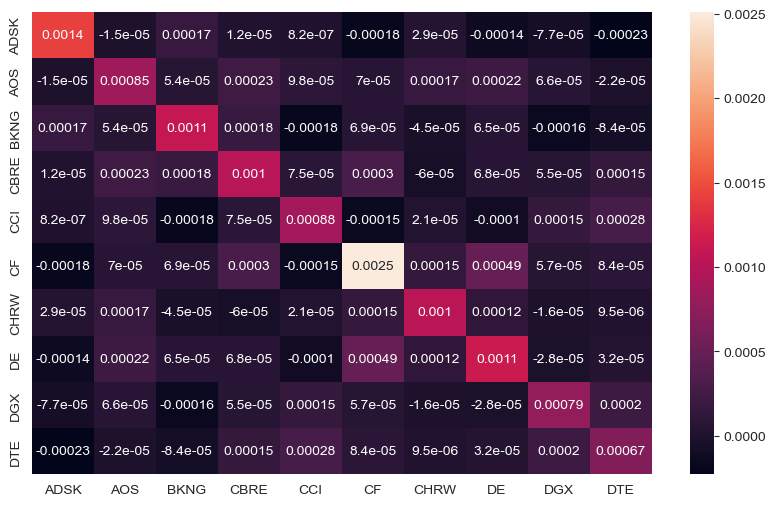

In [ ]:
# Calculate and display correlation matrix for the first ten market-hedged returns
mh_returns = market_hedged_returns.iloc[:, :10].copy()
mh_cov_matrix = mh_returns.cov()
fig, ax = plt.subplots(figsize=(10,6))
mh_heatmap = sns.heatmap(
    mh_cov_matrix,
    xticklabels= mh_cov_matrix.columns,
    yticklabels= mh_cov_matrix.columns,
    annot=True,
)
mh_heatmap; plt.show()

#### 5.4. Portfolio Optimization with Market-Hedged Returns

Construct the tangency portfolio using the alphas (intercept from previous regression) as expected returns and the covariance matrix of the market-hedged returns. Display the portfolio weights.

<span style="color:red">Market-hedged tangency weights are very similar, although the position sizes are more moderate, ranging from -0.2 to 0.2.</span>

Tangency Portfolio Weights using Market-Hedged Returns:


,Tangency Weights,Market-Hedged Tangency Weights
ADSK,0.015003,0.026741
AOS,-0.008088,0.000448
BKNG,0.069375,0.058802
CBRE,0.167008,0.110415
CCI,-0.118067,-0.062549


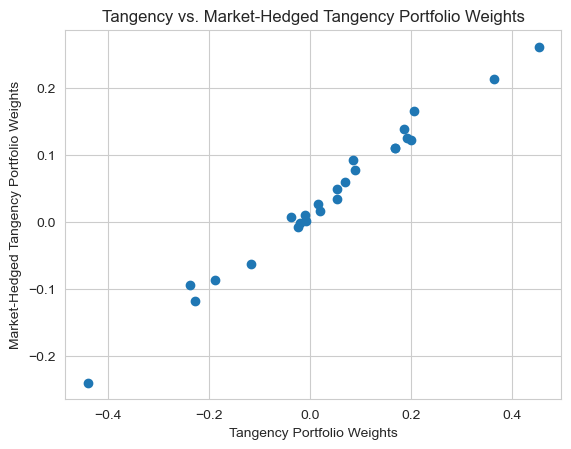

In [ ]:
# Construct tangency portfolio using market-hedged returns
tangency_wts['Market-Hedged Tangency Weights'] = pmh.calc_tangency_weights(returns = market_hedged_returns,
                          cov_mat = 1, # covariance matrix estimated from return series
                          return_port_ret= False,
                          target_ret_rescale_weights = None,
                          annual_factor = ANNUAL_FACTOR, # monthly data
                          name = 'Market-Hedged Tangency',
                          expected_returns = alphas, # use alphas as expected returns
                          expected_returns_already_annualized = False)
print('Tangency Portfolio Weights using Market-Hedged Returns:')
display(tangency_wts.head())

# Compare with 'vanilla' tangency weights
plt.scatter(tangency_wts['Tangency Weights'], tangency_wts['Market-Hedged Tangency Weights'])
plt.xlabel('Tangency Portfolio Weights')
plt.ylabel('Market-Hedged Tangency Portfolio Weights')
plt.title('Tangency vs. Market-Hedged Tangency Portfolio Weights')
plt.grid(True)
plt.show()

#### 5.5. Performance of the Tangency of the Hedged

Calculate the returns to the portfolio with weights from the previous question (just in-sample).

   Report the (annualized)
   * mean
   * volatility
   * Sharpe ratio
   * skewness (not annualized)

<span style="color:red">Note the difference between unhedged tangency portfolio, hedged tangency after the optimization portfolio, and the optimization with market-hedged returns portfolio.</span>

,Tangency,Hedged Tangency,Tangency OOS,Market-Hedged Tangency
Mean,0.2993,0.2160,0.4346,0.2406
Volatility,0.1811,0.1499,0.2169,0.1588
Sharpe Ratio,1.6533,1.4404,2.0034,1.5149
Skewness,-0.0830,0.1697,-0.2853,-0.3642
Excess Kurtosis,-1.6122,-1.9925,-2.9617,-0.2062
Historical VaR 0.05,-0.0328,-0.0265,-0.0391,-0.0286
Historical CVaR 0.05,-0.0490,-0.0393,-0.0482,-0.0473


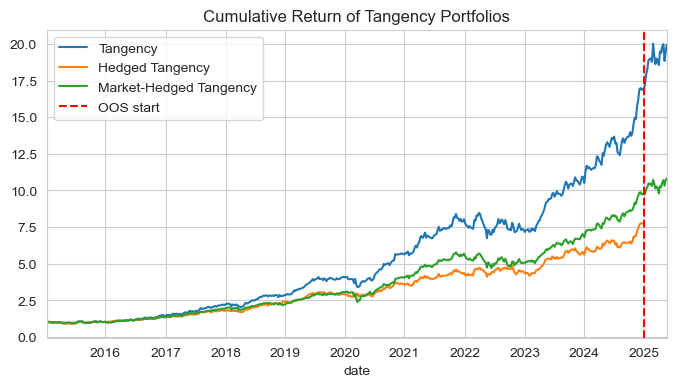

In [ ]:
# Calculate out-of-sample tangency portfolio returns
portfolio_ret['Market-Hedged Tangency'] = tangency_wts['Market-Hedged Tangency Weights'] @ rets.T # compute for all returns
tangency_stats['Market-Hedged Tangency'] = pmh.stats(portfolio_ret[['Market-Hedged Tangency']].loc[start_date:end_date], tail_risk_stats = True, annualization = 52)[stat_names].T
display(tangency_stats)

# Cumulative performance plot including OOS
cum_ret = (portfolio_ret + 1).cumprod()
ax = cum_ret.plot(figsize=(8,4), title='Cumulative Return of Tangency Portfolios')
ax.axvline(pd.to_datetime('2025-01-01'), color='red', linestyle='--', linewidth=1.5, label='OOS start')
ax.legend(); plt.show()

***

# 2. Managing Risk

In [ ]:
DATAFILE = 'data/midterm_1_fund_returns.xlsx'
df = pd.read_excel(DATAFILE, sheet_name='fund returns').set_index('date')
display(df.head())

,fund
date,
2015-01-09,0.003444
2015-01-16,-0.000959
2015-01-23,0.004491
2015-01-30,0.010560
2015-02-06,-0.001624


#### 1. Calculating Volatility
Given the return data provided, calculate the annual volatility grouped by year. Annualize this volatility. That is, your answer should be a DataFrame with 10 rows (one for each year from 2015 to 2024) and a single column representing the annualized volatility for that year.

What do you notice about the volatility across different years?

<font color="red">
Volatility is higher in even years, and lower in odd years. Seems like in even years the volatility is around 20%, while in odd ones it is around 5%.
</font>

In [ ]:
FREQ = 52
annual_volatility = df["fund"].groupby(df.index.year).std() * np.sqrt(FREQ)
annual_volatility.to_frame(name="Annualized Volatility")

,Annualized Volatility
date,
2015,0.046374
2016,0.175849
2017,0.048981
2018,0.184665
2019,0.056721
2020,0.196581
2021,0.039123
2022,0.206772
2023,0.051441


#### 2. Volatility Estimates

Using the return data, compute the annualized volatility estimate as of the last data point using the following methods:
- EWMA volatility with a half-life of 26 weeks.
- Rolling window volatility with a window size of 52 weeks.

**Note:** do not specify a "min_periods" argument anywhere.

In [ ]:
ewma_vol = df["fund"].ewm(halflife=26).std()
rolling_vol = df["fund"].rolling(window=52).std()

# Alternatively, using squared returns:
ewma_vol_sq = np.sqrt((df["fund"]**2).ewm(halflife=26).mean())
rolling_vol_sq = np.sqrt((df["fund"]**2).rolling(window=52).mean())

pd.DataFrame({
    "EWMA Volatility": ewma_vol.iloc[-1:] * np.sqrt(FREQ),
    "Rolling Volatility": rolling_vol.iloc[-1:] * np.sqrt(FREQ),
    "EWMA Volatility (Squared Returns)": ewma_vol_sq.iloc[-1:] * np.sqrt(FREQ),
    "Rolling Volatility (Squared Returns)": rolling_vol_sq.iloc[-1:] * np.sqrt(FREQ)
}).T

date,2024-12-27
EWMA Volatility,0.179730
Rolling Volatility,0.216405
EWMA Volatility (Squared Returns),0.179708
Rolling Volatility (Squared Returns),0.215108


#### 3. Dynamic VaR estimates

Using the return data, compute the 1-week 1% VaR as of the last data point in the series.

You should use two different volatility models to compute the VaR:
- EWMA volatility with a half-life of 26 weeks.
- Rolling-window volatility with a window of 52 weeks.
- Empirical (expanding) VaR.

In [ ]:
from scipy.stats import norm

VAR = 0.01

ewma_vol = df["fund"].ewm(halflife=26).std()
rolling_vol = df["fund"].rolling(window=52).std()

ewma_mean = df["fund"].ewm(halflife=26).mean()
rolling_mean = df["fund"].rolling(window=52).mean()

ewma_vol_sq = np.sqrt((df["fund"]**2).ewm(halflife=26).mean())
rolling_vol_sq = np.sqrt((df["fund"]**2).rolling(window=52).mean())

empirical_var = df["fund"].expanding().quantile(VAR)
z_score = norm.ppf(VAR)

ewma_var = z_score * ewma_vol.iloc[-1]
ewma_var_mean = ewma_mean.iloc[-1] + ewma_var
ewma_var_sq = z_score * ewma_vol_sq.iloc[-1]
rolling_var = z_score * rolling_vol.iloc[-1]
rolling_var_mean = rolling_mean.iloc[-1] + rolling_var
rolling_var_sq = z_score * rolling_vol_sq.iloc[-1]
empirical_var_last = empirical_var.iloc[-1]

pd.DataFrame(
    {
        "EWMA VaR": [ewma_var],
        "EWMA VaR (Non-Zero Mean)": [ewma_var_mean],
        "Rolling VaR": [rolling_var],
        "Rolling VaR (Non-Zero Mean)": [rolling_var_mean],
        "Empirical VaR": [empirical_var_last],
        "EWMA VaR (Squared Returns)": [ewma_var_sq],
        "Rolling VaR (Squared Returns)": [rolling_var_sq],
    },
    index=["1-Week 1% VaR"],
).T

,1-Week 1% VaR
EWMA VaR,-0.057982
EWMA VaR (Non-Zero Mean),-0.060833
Rolling VaR,-0.069814
Rolling VaR (Non-Zero Mean),-0.072373
Empirical VaR,-0.052816
EWMA VaR (Squared Returns),-0.057975
Rolling VaR (Squared Returns),-0.069395


#### 4. Dynamic CVaR estimates

Repeat Question 3, but instead compute the 1-week 1% Conditional VaR (CVaR) as of the last data point in the series using the same three methods.

In [ ]:
empirical_cvar = df["fund"][df["fund"] <= empirical_var_last].mean()
ewma_cvar = -(norm.pdf(z_score) / VAR) * ewma_vol.iloc[-1]
ewma_cvar_mean = ewma_mean.iloc[-1] + ewma_cvar
ewma_cvar_sq = -(norm.pdf(z_score) / VAR) * ewma_vol_sq.iloc[-1]
rolling_cvar = -(norm.pdf(z_score) / VAR) * rolling_vol.iloc[-1]
rolling_cvar_mean = rolling_mean.iloc[-1] + rolling_cvar
rolling_cvar_sq = -(norm.pdf(z_score) / VAR) * rolling_vol_sq.iloc[-1]

pd.DataFrame(
    {
        "EWMA CVaR": [ewma_cvar],
        "EWMA CVaR (Non-Zero Mean)": [ewma_cvar_mean],
        "Rolling CVaR": [rolling_cvar],
        "Rolling CVaR (Non-Zero Mean)": [rolling_cvar_mean],
        "Empirical CVaR": [empirical_cvar],
        "EWMA CVaR (Squared Returns)": [ewma_cvar_sq],
        "Rolling CVaR (Squared Returns)": [rolling_cvar_sq],
    },
    index=["1-Week 1% CVaR"],
).T

,1-Week 1% CVaR
EWMA CVaR,-0.066428
EWMA CVaR (Non-Zero Mean),-0.069279
Rolling CVaR,-0.079983
Rolling CVaR (Non-Zero Mean),-0.082543
Empirical CVaR,-0.065762
EWMA CVaR (Squared Returns),-0.066420
Rolling CVaR (Squared Returns),-0.079504


#### 5. Year Choice

Suppose instead we were interested in our VaR estimates as of the end of 2023 (ie. use all data that is before 2024-01-01). Report your VaR (1-week, 1%) estimates using the same three methods as in Question 3, but now the last data point in 2023.

Hint: You can use `df.loc[:'2023']` to filter the DataFrame to only include data up to the end of 2023.

In [ ]:
ewma_vol_2023 = df.loc[:"2023", "fund"].ewm(halflife=26).std()
ewma_vol_sq_2023 = np.sqrt((df.loc[:"2023", "fund"]**2).ewm(halflife=26).mean())
rolling_vol_2023 = df.loc[:"2023", "fund"].rolling(window=52).std()
rolling_vol_sq_2023 = np.sqrt((df.loc[:"2023", "fund"]**2).rolling(window=52).mean())
empirical_var_2023 = df.loc[:"2023", "fund"].expanding().quantile(VAR)

ewma_mean_2023 = df.loc[:"2023", "fund"].ewm(halflife=26).mean()
rolling_mean_2023 = df.loc[:"2023", "fund"].rolling(window=52).mean()

ewma_var_2023 = z_score * ewma_vol_2023.iloc[-1]
ewma_var_mean_2023 = ewma_mean_2023.iloc[-1] + ewma_var_2023
ewma_var_sq_2023 = z_score * ewma_vol_sq_2023.iloc[-1]
rolling_var_2023 = z_score * rolling_vol_2023.iloc[-1]
rolling_var_mean_2023 = rolling_mean_2023.iloc[-1] + rolling_var_2023
rolling_var_sq_2023 = z_score * rolling_vol_sq_2023.iloc[-1]
empirical_var_2023_last = empirical_var_2023.iloc[-1]

pd.DataFrame(
    {
        "EWMA VaR (2023)": [ewma_var_2023],
        "EWMA VaR (2023) (Non-Zero Mean)": [ewma_var_mean_2023],
        "Rolling VaR (2023)": [rolling_var_2023],
        "Rolling VaR (2023) (Non-Zero Mean)": [rolling_var_mean_2023],
        "Empirical VaR (2023)": [empirical_var_2023_last],
        "EWMA VaR (2023) (Squared Returns)": [ewma_var_sq_2023],
        "Rolling VaR (2023) (Squared Returns)": [rolling_var_sq_2023],
    },
    index=["1-Week 1% VaR as of end 2023"],
).T

,1-Week 1% VaR as of end 2023
EWMA VaR (2023),-0.032412
EWMA VaR (2023) (Non-Zero Mean),-0.032674
Rolling VaR (2023),-0.016595
Rolling VaR (2023) (Non-Zero Mean),-0.016881
Empirical VaR (2023),-0.049635
EWMA VaR (2023) (Squared Returns),-0.032201
Rolling VaR (2023) (Squared Returns),-0.016448


### 6. Compare

What do you notice about the VaR estimates compared to those from question `2.3`?

<font color="red">
Noticing that volatility in 2023 was about 5%, and volatility in 2024 was about 20%, we see that:

The EWMA and rolling VaR estimates for the end of 2023 are much lower than those of 2024, which makes sense as normal var is proportional to volatility.

The empirical VaR estimate barely changes (from ~5.2% to 4.9%).

Additionally, the rolling VaR does the best, which makes sense given that it is not including *any* data from 2024, while the EWMA with a 26-week half-life, still includes data from 2024 (albeit with less than a quarter weight).
</font>